In [6]:
import xarray as xr
import os
import pandas as pd
from datetime import datetime
import rasterio
from matplotlib import pyplot as plt

In [7]:
path = '/work/mech-ai-scratch/rtali/gis-CDL/final_CDL'
sub_folder = 'IN4326'



In [24]:
cdl = xr.load_dataset(os.path.join(path,'2019_WGS84.tif'))
cdl

<xarray.Dataset> Size: 765MB
Dimensions:      (band: 1, x: 19724, y: 9696)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 158kB -96.65 -96.65 -96.65 ... -90.02 -90.02 -90.02
  * y            (y) float64 78kB 43.59 43.59 43.59 43.59 ... 40.33 40.33 40.33
    spatial_ref  int64 8B 0
Data variables:
    band_data    (band, y, x) float32 765MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

In [25]:
cdl.band_data.max()

<xarray.DataArray 'band_data' ()> Size: 4B
array(240., dtype=float32)
Coordinates:
    spatial_ref  int64 8B 0

In [ ]:
cdl.__xarray_dataarray_variable__.plot()

In [ ]:
clss = cdl['__xarray_dataarray_variable__']

In [ ]:
df = clss.to_dataframe()
df

In [ ]:
df.__xarray_dataarray_variable__.value_counts()

In [ ]:
weather = xr.load_dataset(os.path.join(path,'WEATHER','IA_2023.nc'))
weather

<xarray.Dataset> Size: 9MB
Dimensions:                  (x: 625, y: 339)
Coordinates:
  * x                        (x) float64 5kB -96.8 -96.78 ... -89.64 -89.63
  * y                        (y) float64 3kB 43.87 43.85 43.84 ... 40.0 39.99
    time                     datetime64[ns] 8B 2023-05-21
    lambert_conformal_conic  int64 8B 0
Data variables:
    dayl                     (y, x) float32 848kB nan nan nan ... nan nan nan
    lat                      (y, x) float64 2MB nan nan nan nan ... nan nan nan
    lon                      (y, x) float64 2MB nan nan nan nan ... nan nan nan
    prcp                     (y, x) float32 848kB nan nan nan ... nan nan nan
    srad                     (y, x) float32 848kB nan nan nan ... nan nan nan
    swe                      (y, x) float32 848kB nan nan nan ... nan nan nan
    tmax                     (y, x) float32 848kB nan nan nan ... nan nan nan
    tmin                     (y, x) float32 848kB nan nan nan ... nan nan nan
    vp                       (y, x) float32 848kB nan nan nan ... nan nan nan
Attributes:
    citation:            Please see http://daymet.ornl.gov/ for current Dayme...
    references:          Please see http://daymet.ornl.gov/ for current infor...
    start_year:          2023
    source:              Daymet Software Version 4.0
    Version_data:        Daymet Data Version 4.0
    Version_software:    Daymet Software Version 4.0
    Conventions:         CF-1.6
    History:             Translated to CF-1.0 Conventions by Netcdf-Java CDM ...
    geospatial_lat_min:  39.97591721881702
    geospatial_lat_max:  43.880950040858615
    geospatial_lon_min:  -96.81426396587968
    geospatial_lon_max:  -89.6280561958434

In [5]:
weather = weather.drop_dims('lambert_conformal_conic')
weather

ValueError: Dimensions ('lambert_conformal_conic',) not found in data dimensions ('x', 'y', 'time')

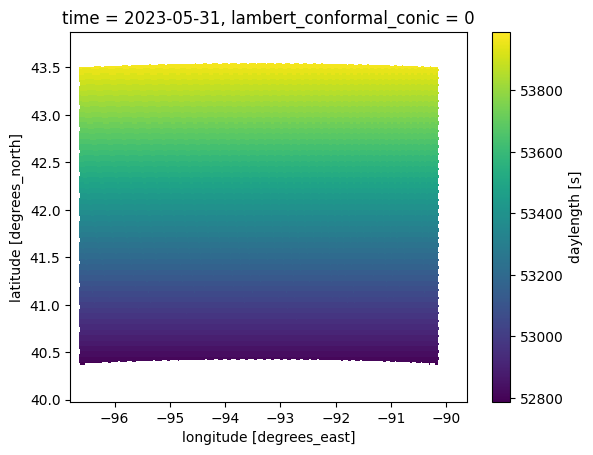

In [25]:
weather.dayl.isel(time=150).plot()

In [7]:
date = '2023-07-23'
date_object = datetime.strptime(date, '%Y-%m-%d')
doy = date_object.timetuple().tm_yday

In [8]:
weather_dir='/work/mech-ai-scratch/rtali/AI_READY_IOWA/WEATHER_TIFFS'
path = os.path.join(weather_dir,f'{date}.tif')
# Open the GeoTIFF file
with rasterio.open(path) as src:
    # Read all bands of the image as a NumPy array
    multispectral_data = src.read()

    # Get metadata information
    profile = src.profile
    num_bands = src.count
    height = src.height
    width = src.width
    crs = src.crs
    transform = src.transform
    band_descriptions = src.descriptions

# Print some info
print("Shape of the data:", multispectral_data.shape)
print("Number of bands:", num_bands)
print("Height:", height)
print("Width:", width)
print("CRS:", crs)
print("Transform:", transform)
print("Bands", band_descriptions)

Shape of the data: (7, 339, 625)
Number of bands: 7
Height: 339
Width: 625
CRS: EPSG:4326
Transform: | 0.01, 0.00,-96.80|
| 0.00,-0.01, 43.87|
| 0.00, 0.00, 1.00|
Bands (None, None, None, None, None, None, None)


In [9]:
src = rasterio.open(path)
data = src.read()
data
# plt.imshow(src.read(3), cmap='pink')

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

In [10]:
xr.open_dataset(path, decode_coords="all")

<xarray.Dataset> Size: 6MB
Dimensions:      (band: 7, x: 625, y: 339)
Coordinates:
  * band         (band) int64 56B 1 2 3 4 5 6 7
  * x            (x) float64 5kB -96.8 -96.78 -96.77 ... -89.66 -89.64 -89.63
  * y            (y) float64 3kB 43.87 43.85 43.84 43.83 ... 40.01 40.0 39.99
    spatial_ref  int64 8B ...
Data variables:
    band_data    (band, y, x) float32 6MB ...

In [16]:
weather_dir='/work/mech-ai-scratch/rtali/AI_READY_IOWA/SOIL'
tiff_list = [f for f in os.listdir(weather_dir) if f.endswith('.tif')]
for tif_file in tiff_list:
    path = os.path.join(weather_dir, tif_file)
    soil_data = xr.open_dataset(path, decode_coords="all")
    soil_data = soil_data.rio.reproject('EPSG:4326')
    soil_data.isel(band=0).rio.to_raster(path)


In [18]:
soil_data.isel(band=0)

<xarray.Dataset> Size: 80MB
Dimensions:      (x: 5979, y: 3326)
Coordinates:
  * x            (x) float64 48kB -96.79 -96.79 -96.78 ... -88.53 -88.53 -88.53
  * y            (y) float64 27kB 44.59 44.59 44.59 44.58 ... 40.0 40.0 40.0
    band         int64 8B 1
    spatial_ref  int64 8B 0
Data variables:
    band_data    (y, x) float32 80MB nan nan nan nan nan ... nan nan nan nan nan

In [10]:
soil_data.spatial_ref

<xarray.DataArray 'spatial_ref' ()> Size: 8B
[1 values with dtype=int64]
Coordinates:
    spatial_ref  int64 8B ...
Attributes: (12/18)
    crs_wkt:                        PROJCS["USA_Contiguous_Albers_Equal_Area_...
    semi_major_axis:                6378137.0
    semi_minor_axis:                6356752.314140356
    inverse_flattening:             298.257222101004
    reference_ellipsoid_name:       GRS 1980
    longitude_of_prime_meridian:    0.0
    ...                             ...
    latitude_of_projection_origin:  23.0
    longitude_of_central_meridian:  -96.0
    false_easting:                  0.0
    false_northing:                 0.0
    spatial_ref:                    PROJCS["USA_Contiguous_Albers_Equal_Area_...
    GeoTransform:                   -62395.0 125.0 0.0 2399905.0 0.0 -125.0